# Máquinas de vectores de soporte
## Suport Vector Machine - SVM

Las máquinas de soporte vectorial son un conjunto de algoritmos de aprendizaje supervisado para resolver problemas de clasificación y regresión Dado un conjunto de ejemplos de entrenamiento podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra.

Representa los puntos de muestra en el espacio separando las clases en dos espacios lo más amplio posible mediante un hiperplano de separación que se denomina vector de soporte.

Separamos los puntos verdes de los azules mediante unas líneas rectas o curvas que maximice el espacio entre las dos clases.

Muestra una nueva clase según en qué espacio caigan en las verdes o en las azules las podemos etiquetar de una clase o de la otra.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flores=sns.load_dataset('iris')
flores.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
flores['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

c:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

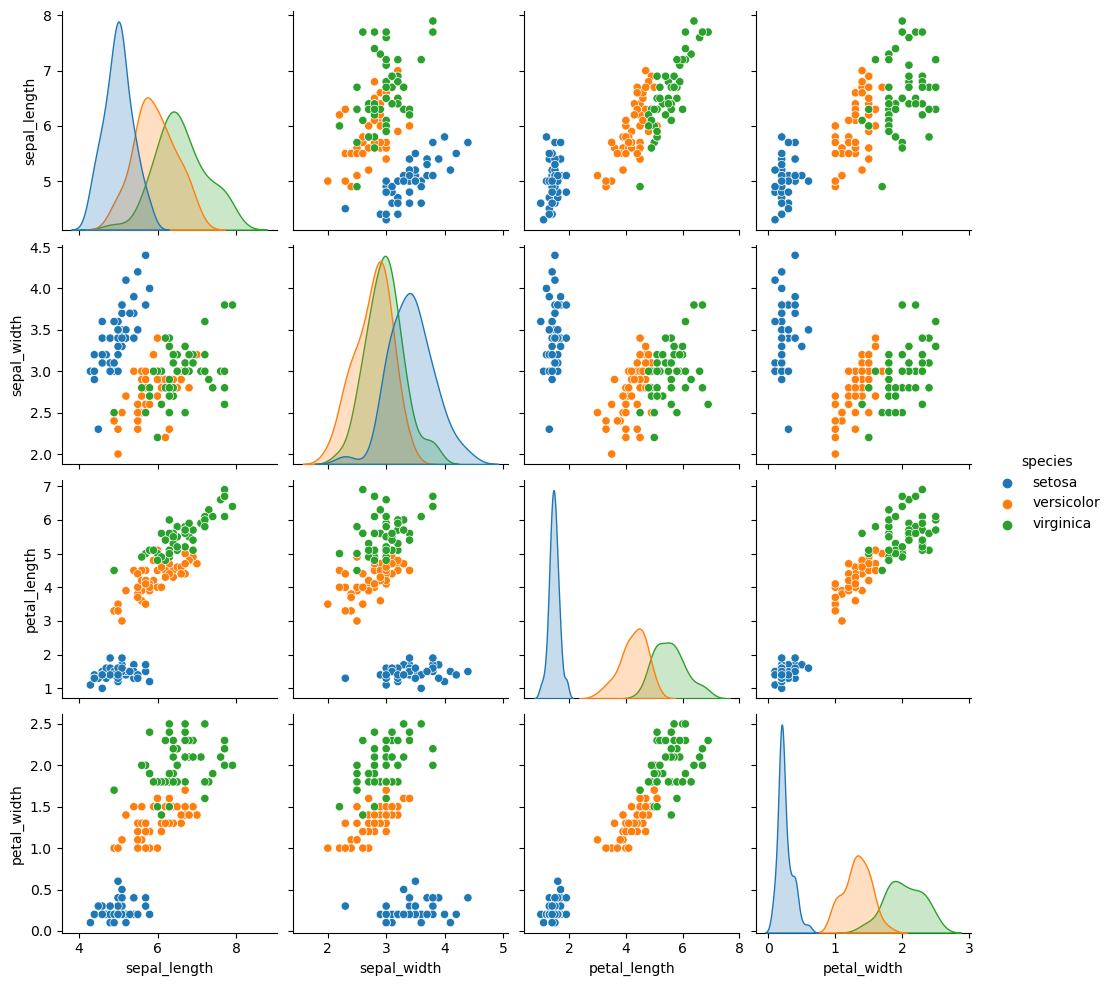

In [5]:
sns.pairplot(flores, hue='species')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y=flores['species']
X=flores.drop('species',axis=1)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [10]:
from sklearn.svm import SVC

In [19]:
modelo=SVC(gamma='auto')

In [20]:
modelo.fit(X_train,y_train)

SVC(gamma='auto')

In [21]:
predicciones=modelo.predict(X_test)

In [14]:
predicciones

array(['virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor'], dtype=object)

In [15]:
y_test

120     virginica
27         setosa
134     virginica
20         setosa
21         setosa
46         setosa
136     virginica
78     versicolor
28         setosa
74     versicolor
135     virginica
41         setosa
47         setosa
62     versicolor
1          setosa
23         setosa
105     virginica
55     versicolor
106     virginica
58     versicolor
109     virginica
121     virginica
10         setosa
137     virginica
36         setosa
99     versicolor
116     virginica
138     virginica
98     versicolor
39         setosa
22         setosa
100     virginica
115     virginica
12         setosa
128     virginica
2          setosa
112     virginica
59     versicolor
30         setosa
37         setosa
125     virginica
50     versicolor
63     versicolor
149     virginica
94     versicolor
Name: species, dtype: object

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
print(classification_report(y_test,predicciones))
print(confusion_matrix(y_test,predicciones))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.91      0.95        11
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]


# Algoritmo de k-medias

El algoritmo de k medias es un algoritmo de aprendizaje no supervisado para resolver el problema de la clusterización.

Tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.

Es un método utilizado en minería de datos. Aquí tienes un gráfico para distintas fases que pasa el algoritmo para conseguir agrupar las observaciones en tres grupos.

<img src="https://datacuber.cl/images/k-means/k-means-algo.png" alt="Fases Algoritmo K-medias">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [11]:
datos=make_blobs(n_samples=200,n_features=2,centers=4) #crea un array con 1 fila y 2 columnas, en la columna 1 tienes los datos de ejemplos, en la 2, el centro asignado a cada punto

In [4]:
datos

(array([[ 6.38774733e-01,  6.05446229e+00],
        [ 1.60707906e+00,  5.43511116e+00],
        [ 1.28513355e+00,  5.90377328e+00],
        [-3.18412300e-02,  5.17219764e+00],
        [ 5.98872973e-01,  7.20408418e+00],
        [ 2.75097031e+00, -4.55160884e+00],
        [ 1.17134986e+01, -1.01853709e+00],
        [ 7.07259612e+00,  1.99297711e+00],
        [ 1.03948032e+01, -1.45072067e+00],
        [-4.33284074e-01,  6.37619069e+00],
        [ 1.43570664e+00,  6.53560814e+00],
        [ 1.13787750e+01, -2.17741009e+00],
        [ 8.97927693e+00,  8.84852963e-02],
        [ 3.53846259e+00, -3.55216415e+00],
        [ 1.28274989e+00,  7.10623326e+00],
        [ 3.40779247e+00, -5.39025751e+00],
        [ 9.65466362e+00,  4.83556705e+00],
        [ 2.99046027e+00, -5.42456239e+00],
        [ 6.71904704e-01,  5.79482988e+00],
        [ 8.76131742e+00,  3.13424586e+00],
        [ 4.18179935e-01,  7.00044535e+00],
        [ 1.82602275e+00, -4.87266785e+00],
        [ 4.31197994e+00, -5.049

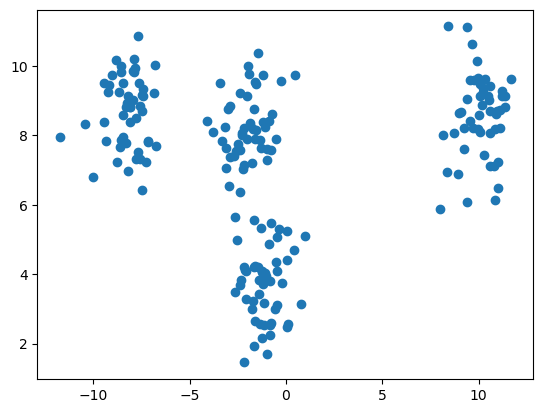

In [12]:
plt.scatter(datos[0][:,0],datos[0][:,1])

In [13]:
from sklearn.cluster import KMeans

In [14]:
modelo=KMeans(n_clusters=4)

In [15]:
modelo.fit(datos[0])

c:\Users\borgu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\borgu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
modelo.cluster_centers_

array([[-1.12828074,  3.73285532],
       [10.07295361,  8.55334075],
       [-8.23169118,  8.68913906],
       [-1.98033529,  8.25421878]])

In [17]:
modelo.labels_

array([1, 0, 3, 2, 1, 2, 2, 1, 0, 0, 1, 3, 3, 2, 3, 2, 2, 0, 0, 3, 0, 2,
       1, 0, 0, 2, 3, 3, 2, 2, 2, 0, 1, 1, 0, 2, 1, 3, 1, 2, 2, 0, 1, 1,
       0, 0, 3, 0, 3, 1, 1, 1, 0, 1, 3, 0, 0, 2, 2, 3, 3, 3, 0, 1, 2, 1,
       2, 3, 3, 2, 3, 0, 2, 0, 0, 1, 3, 1, 2, 2, 3, 2, 1, 0, 1, 1, 1, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 0, 3, 3, 3, 2, 0, 3, 2, 1, 3, 0,
       2, 1, 3, 3, 1, 0, 1, 3, 3, 2, 2, 0, 0, 3, 2, 1, 0, 1, 2, 0, 3, 0,
       2, 1, 2, 0, 2, 0, 2, 3, 0, 2, 3, 0, 3, 1, 1, 3, 0, 0, 0, 1, 3, 2,
       1, 2, 1, 3, 1, 0, 1, 3, 0, 1, 2, 2, 1, 0, 3, 1, 1, 3, 3, 2, 2, 1,
       3, 3, 1, 0, 0, 0, 3, 2, 0, 2, 3, 2, 1, 3, 1, 1, 3, 2, 2, 3, 0, 2,
       0, 2])

Text(0.5, 1.0, 'Datos originales')

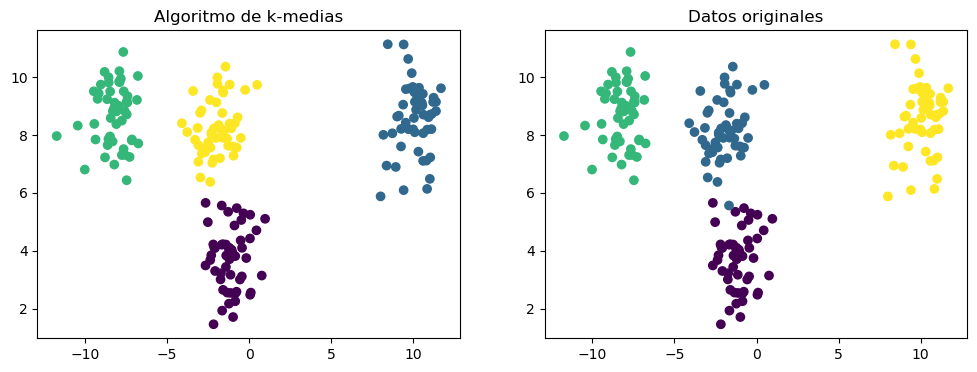

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.scatter(datos[0][:,0],datos[0][:,1],c=modelo.labels_)
ax1.set_title('Algoritmo de k-medias')

ax2.scatter(datos[0][:,0],datos[0][:,1],c=datos[1])
ax2.set_title('Datos originales')
